# Forecasting Inflasi di Indonesia Tahun 2023-2024 Menurut Kelompok Makanan, Minuman, dan Tembakau

<b><span style="font-size:15px;">
author: Michelle Kurniawan
    
<b><span style="font-size:15px;">
date: 12 Juni 2023
    
<b><span style="font-size:15px;">
email: m.michellekurniawan@gmail.com

<span style="font-size:17px;">Inflasi adalah kenaikan nilai atau harga suatu barang dalam jangka waktu tertentu. Inflasi dapat dipengaruhi oleh beberapa faktor, yaitu:
    
<span style="font-size:17px;">1. Cost push inflation
    
<span style="font-size:17px;">2. Demand pull inflation

<span style="font-size:17px;">3. Ekspektasi inflasi
    
<span style="font-size:17px;">Suatu negara tentunya menginginkan nilai inflasi yang rendah dan stabil untuk memenuhi kesejahteraan masyarakat. Penting bagi negara untuk memprediksi nilai inflasi yang akan terjadi sehingga dapat dilakukan pencegahan inflasi yang lebih tinggi. Oleh karena itu, kita akan melakukan forecasting dengan model ARIMA untuk memprediksi inflasi sampai akhir tahun 2024.
        
<span style="font-size:17px;">
Daftar Isi:

1. Rangkuman Dataset
    
2. Grafik Inflasi

3. Menentukan model ARIMA terbaik

4. Menghitung prediksi

5. Grafik Prediksi terhadap Nilai Aktual

6. Forecasting dan grafiknya
    
    
<span style="font-size:17px;">
Apa yang harus dilakukan?
    
Analisa data inflasi tahun 2020-2023 kemudian tentukan model ARIMA terbaik untuk melakukan forecasting 18 bulan kedepan.

    
<span style="font-size:17px;">    
Rumusan Masalah:
        
Bagaimana dengan inflasi yang akan terjadi sampai akhir tahun 2024?

    
<b><span style="font-size:17px;"> Tujuan:
    
<span style="font-size:17px;">Mencari nilai inflasi yang akan terjadi sampai akhir tahun 2024.

<b><span style="font-size:17px;">source: 
* https://www.bps.go.id/indicator/3/1917/4/inflasi-tahun-kalender-2018-100-menurut-kelompok-dan-sub-kelompok-01-makanan-minuman-dan-tembakau.html
* https://www.bps.go.id/indicator/3/1917/3/inflasi-tahun-kalender-2018-100-menurut-kelompok-dan-sub-kelompok-01-makanan-minuman-dan-tembakau.html
* https://www.bps.go.id/indicator/3/1917/2/inflasi-tahun-kalender-2018-100-menurut-kelompok-dan-sub-kelompok-01-makanan-minuman-dan-tembakau.html
* https://www.bps.go.id/indicator/3/1917/1/inflasi-tahun-kalender-2018-100-menurut-kelompok-dan-sub-kelompok-01-makanan-minuman-dan-tembakau.html

# Install Library

In [476]:
# Install library
#!pip install ydata-profiling
#!pip install pmdarima

# Import Library

In [477]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from ydata_profiling import ProfileReport

# Loading and Processing Data

In [478]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2023 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx
/kaggle/input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2020 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx
/kaggle/input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2022 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx
/kaggle/input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2021 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx


In [479]:
# Import data 
data20 = pd.read_excel('../input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2020 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx', header=None)
data21 = pd.read_excel('../input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2021 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx', header= None)
data22 = pd.read_excel('../input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2022 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx', header=None)
data23 = pd.read_excel('../input/inflasi-makananminuaman-dan-tembakau/Inflasi Tahun 2023 Menurut Kelompok dan Sub Kelompok  01 Makanan Minuman dan Tembakau.xlsx', header=None)

In [480]:
# Menampilkan data
data20

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,90 Kota Inflasi (2018=100),Inflasi Tahun Kalender (2018=100) Menurut Kelo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Makanan, Minuman dan Tembakau",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,...,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan
4,KOTA MEULABOH,3.69,3.04,4.18,2.75,4.33,4.10,3.10,4.46,4.67,...,4.96,6.97,6.97,6.97,7.53,7.53,7.53,7.53,7.55,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,INDONESIA,1.62,2.58,2.69,2.78,2.46,2.94,2.19,1.31,0.93,...,4.88,5.34,5.54,6.22,6.84,7.06,7.18,7.39,7.66,-
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"\nMulai Tahun 2020, digunakan tahun dasar 2018...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Source Url: https://www.bps.go.id/indicator/3/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleansing

In [481]:
# Ambil data 
data_20 = data20.iloc[3:95, 0:13]
data_20

,0,1,2,3,4,5,6,7,8,9,10,11,12
3,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
4,KOTA MEULABOH,3.69,3.04,4.18,2.75,4.33,4.10,3.10,4.46,4.67,5.64,5.77,8.39
5,KOTA BANDA ACEH,1.35,1.36,2.90,2.41,2.34,1.66,-0.11,0.72,-0.19,2.47,3.35,6.39
6,KOTA LHOKSEUMAWE,0.19,1.23,2.60,1.66,1.69,1.67,0.23,0.64,0.48,3.26,3.90,8.01
7,KOTA SIBOLGA,0.57,2.36,0.05,-1.50,-1.59,-1.36,-2.20,-2.50,-1.70,1.08,1.76,4.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,KOTA SORONG,0.59,1.68,1.90,3.23,3.40,4.53,5.01,4.53,4.17,2.97,4.50,5.36
91,MERAUKE,1.32,3.79,-1.14,0.11,2.28,2.67,1.01,-1.44,-1.03,-1.57,0.68,2.90
92,TIMIKA,2.40,4.84,2.01,5.04,6.70,8.87,9.92,10.12,8.06,8.77,8.94,9.85
93,KOTA JAYAPURA,0.95,2.86,2.31,3.35,3.31,2.86,2.13,-0.28,-0.59,-1.38,-0.33,1.05


In [482]:
# Ambil baris pertama sebagai header
new_header = data_20.iloc[0]
# Ambil baris selanjutnya sebagai data
data_20 = data_20[1:]
# Tetapkan new_header sebagai header baru dataframe
data_20.columns = new_header
data_20.head(3)

3,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
4,KOTA MEULABOH,3.69,3.04,4.18,2.75,4.33,4.10,3.10,4.46,4.67,5.64,5.77,8.39
5,KOTA BANDA ACEH,1.35,1.36,2.90,2.41,2.34,1.66,-0.11,0.72,-0.19,2.47,3.35,6.39
6,KOTA LHOKSEUMAWE,0.19,1.23,2.60,1.66,1.69,1.67,0.23,0.64,0.48,3.26,3.90,8.01


In [483]:
# Mencari jumlah data yang tidak memiliki nilai di masing-masing kolom
isnull = data_20.isnull().sum()
isnull

3
NaN          0
Januari      0
Februari     0
Maret        0
April        0
Mei          0
Juni         0
Juli         0
Agustus      0
September    0
Oktober      0
November     0
Desember     0
dtype: int64

In [484]:
# Ambil data INDONESIA
data_20 = data_20.iloc[-1:,1:]
data_20

3,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
94,1.62,2.58,2.69,2.78,2.46,2.94,2.19,1.31,0.93,1.23,2.10,3.63


In [485]:
# Ulangi langkah-langkah untuk data yang lainnya

# Data 2021
data_21 = data21.iloc[3:95, 0:13]
new_header = data_21.iloc[0] #grab the first row for the header
data_21 = data_21[1:] #take the data less the header row
data_21.columns = new_header #set the header row as the df header
data_21 = data_21.iloc[-1:,1:]

#Data 2022
data_22 = data22.iloc[3:95, 0:13]
new_header = data_22.iloc[0] #grab the first row for the header
data_22 = data_22[1:] #take the data less the header row
data_22.columns = new_header #set the header row as the df header
data_22 = data_22.iloc[-1:,1:]

#Data 2023
data_23 = data23.iloc[3:95, 0:6]
new_header = data_23.iloc[0] #grab the first row for the header
data_23 = data_23[1:] #take the data less the header row
data_23.columns = new_header #set the header row as the df header
data_23 = data_23.iloc[-1:,1:]

### Data Integration

In [486]:
# Menggabungkan semua dataframe menjadi satu
combined_df = pd.concat([data_20, data_21, data_22, data_23], ignore_index=True)

In [487]:
# Membuat kolom baru bernama "Year"
tahun_values = [2020, 2021, 2022, 2023]
combined_df['Year'] = tahun_values

In [488]:
# unpivot dari kolom menjadi baris
df = combined_df.melt(id_vars=['Year'], var_name='Month', value_name='Inflasi')
df.head()

,Year,Month,Inflasi
0,2020,Januari,1.62
1,2021,Januari,0.81
2,2022,Januari,1.17
3,2023,Januari,1.16
4,2020,Februari,2.58


In [489]:
# Konversikan string "Month" menjadi bilangan numerik
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

df['Month'] = df['Month'].map(month_mapping)

In [490]:
# Menambah kolom "Date" dan isi dengan hari terakhir dari tiap bulannya
from pandas.tseries.offsets import MonthEnd
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1)) + MonthEnd(1)

# Urutkan berdasarkan Date dari terkecil sampai terbesar
df = df.sort_values(by=['Date'])
df.head()

,Year,Month,Inflasi,Date
0,2020,1,1.62,2020-01-31
4,2020,2,2.58,2020-02-29
8,2020,3,2.69,2020-03-31
12,2020,4,2.78,2020-04-30
16,2020,5,2.46,2020-05-31


In [491]:
# Konversikan balik bilangan numerik menjadi string "Month"
month_reverse_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Bulan'] = df['Month'].map(month_reverse_mapping)

# Hapus row dengan nilai NaN
df.dropna(subset=['Inflasi'], inplace=True)
df.tail()

,Year,Month,Inflasi,Date,Bulan
3,2023,1,1.16,2023-01-31,Januari
7,2023,2,1.65,2023-02-28,Februari
11,2023,3,2.00,2023-03-31,Maret
15,2023,4,2.35,2023-04-30,April
19,2023,5,2.84,2023-05-31,Mei


In [492]:
# Ubah tipe data kolom "Inflasi" menjadi numerik
df['Inflasi'] = pd.to_numeric(df['Inflasi'])

In [493]:
ProfileReport(df, title='Dataset Report of Inflasi Makanan, Minuman, dan Tembakau di Indonesia Tahun 2020-2023', minimal=True, progress_bar=False, samples=None, correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}}, html={'style':{'primary_color': '#45658F'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

Berdasarkan report, tidak ada nilai kosong di data dan juga tipe data Inflasi dan Date sudah tepat sehingga data sudah siap untuk digunakan.
Pada data Inflasi, terdapat 3 data inflasi yang memiliki nilai yang sama sehingga persentase keunikannya adalah 92,7%.

Untuk keperluan visualisasi menggunakan aplikasi yang lain, data harus diekspor ke dalam bentuk excel agar dapat digunakan.

In [494]:
# Ekspor data ke dalam bentuk excel
df.to_excel('Data Bersih.xlsx',index=False)

# Data Exploration and Visualization

In [495]:
# Ambil kolom yang digunakan
data = df[['Date', 'Inflasi']]

# Tetapkan kolom "Date" sebagai index
data2 = data.set_index('Date')
data2.head(5)

,Inflasi
Date,
2020-01-31,1.62
2020-02-29,2.58
2020-03-31,2.69
2020-04-30,2.78
2020-05-31,2.46


<Axes: xlabel='Date'>

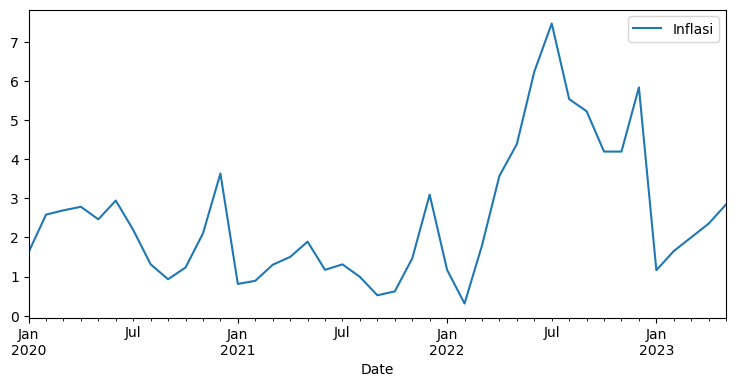

In [496]:
# Plot perkembangan inflasi terhadap Date
df.plot(x='Date', y='Inflasi', figsize=(9,4))

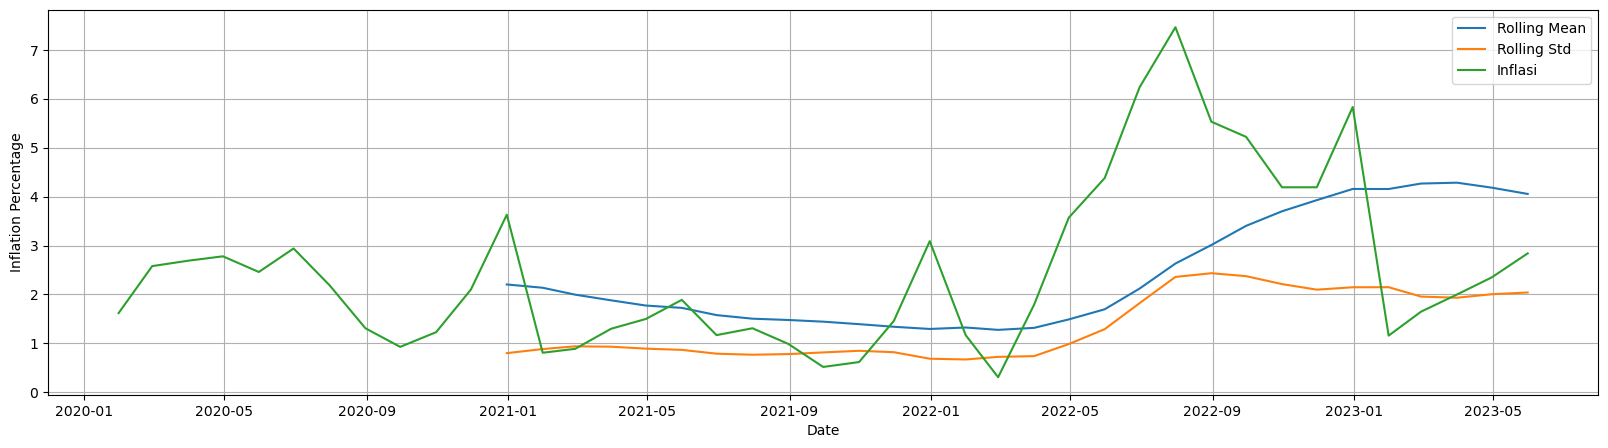

In [497]:
# Plot lainnya

time_series = data2['Inflasi']
date_series = df['Date']
mean = time_series.rolling(window=12).mean()
std = time_series.rolling(window=12).std()
plt.figure(figsize=(20,5))
plt.plot(date_series, mean, label='Rolling Mean')
plt.plot(date_series, std, label='Rolling Std')
plt.plot(date_series,time_series,label='Inflasi')
plt.legend()
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Inflation Percentage')
plt.grid()
plt.show()

Berdasarkan grafik, garis rolling std bukan merupakan garis lurus. Artinya, terdapat perbedaan data yang cukup signifikan, terutama di bulan Agustus 2022.

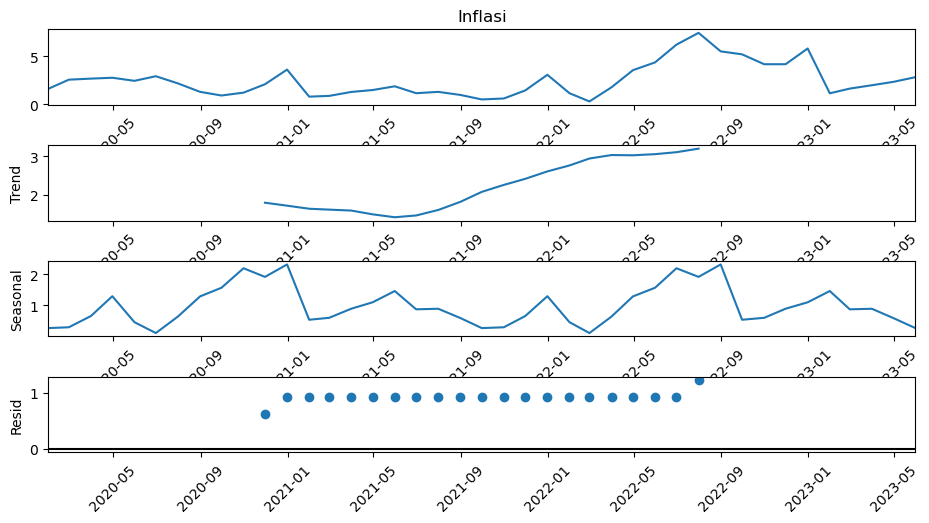

In [498]:
# plot decomposition components
decomp = seasonal_decompose(time_series, model='multiplicative', filt=None, period=int(len(data2)/2), two_sided=True, extrapolate_trend=0)
fig = decomp.plot()
for ax in fig.get_axes():
    ax.tick_params(axis='x', rotation=45)
fig.set_size_inches(10, 8)
plt.show()

Grafik 1. Observed
nilai asli yang diambil dari data.
Grafik 2. Trend
Menggambarkan tren nilai Inflasi. Tren dapat naik atau turun. Apabila tren linear naik/turun, maka datanya bersifat additive. 
Pada kasus ini, tren turun sampai sekitar bulan Juni 2021, kemudian terus meningkat. Maka, tren yang akan digunakan adalah multiplicative.
Grafik 3. Seasonal
Pola dari data. Jika pola data memiliki amplitudo yang sama besar, maka seasonal nya additive. Jika amplitudonya semakin membesar, maka multiplicative. Pada grafik tersebut, dapat dilihat bahwa amplitudo nya tidak bertambah besar. Maka, seasonal nya adalah additive.
Grafik 4. Residual
Menggambarkan variasi acak.

# ARIMA Model

### Mengecek Kestasioneran Data

Data dikatakan stasioner apabila memiliki p-value lebih kecil dari 0.05
Untuk itu, kita akan menggunakan uji hipotesis dengan
Ho = data tidak stasioner
H1 = data stasioner

In [499]:
# Mengecek kestasioneran Inflasi

# ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('1. ADF: ', result[0])
    print('2. P-value: ', result[1])
    print('3. Num of Lags: ', result[2])
    print('4. Num of Observations: ', result[3])
    print('5. Critial Values:')
    for key, value in result[4].items():
        print('\t', key, ': ', value)
        
    if result[1] <= 0.05:
        print('\nHipotesis nol (Ho) ditolak. Data stasioner.')
    else:
        print('\nHipotesis nol (H0) tidak ditolak. Data tidak stasioner.')

adf_test(data2['Inflasi'])

1. ADF:  -2.478905479801758
2. P-value:  0.12069157163772609
3. Num of Lags:  0
4. Num of Observations:  40
5. Critial Values:
	 1% :  -3.6055648906249997
	 5% :  -2.937069375
	 10% :  -2.606985625

Hipotesis nol (H0) tidak ditolak. Data tidak stasioner.


Karena data tidak stasioner, maka nilai d tidak dapat dianggap 0(nol). 

### Mencari Nilai p,d,q untuk Model ARIMA

In [500]:
# Mencari nilai pembedaan (differencing)
print(ndiffs(data2['Inflasi'], test='adf'))
print(ndiffs(data2['Inflasi'], test='kpss'))
print(ndiffs(data2['Inflasi'], test='pp'))

1
0
1


Untuk mencari orde p dan q, salah satu cara yang dapat digunakan adalah dengan plotting grafik ACF dan PACF

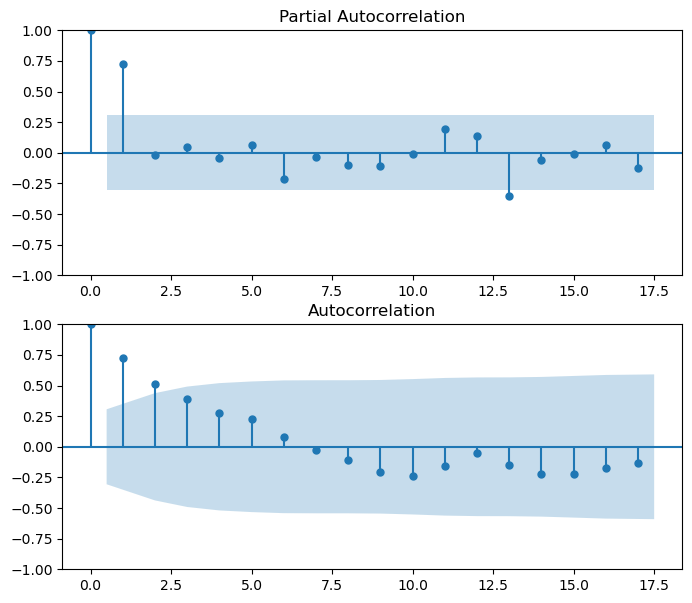

In [501]:
# Mencari orde dari AR dan MA

# Plot grafik ACF and PACF
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(2,1,1)
fig = plot_pacf(data2['Inflasi'], ax=ax1,method='ywm')
ax2 = fig.add_subplot(2,1,2)
fig = plot_acf(data2['Inflasi'], ax=ax2)
plt.show()

Jika kita lihat grafik PACF, nilai setelah lag 2 berubah sangat ekstrim. Maka, nilai p adalah 2. 
Dari grafik di atas, tail off pattern terlihat pada grafik ACF. Maka, model data ini adalah AR(2) dan nilai q = 0.


### Fungsi Auto ARIMA

Python memiliki library yang dapat mengeluarkan model terbaik untuk ARIMA. Fungsi ini dinamakan auto_arima. Pada percobaan ini, kita akan menggunakan order dari Auto ARIMA, bukan dari grafik.

In [502]:
# Mencari p,d,q dengan auto ARIMA
stepwise_fit = auto_arima(data2['Inflasi'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=140.762, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=163.439, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.443, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=143.801, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=208.597, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=137.414, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=137.410, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=139.126, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.632 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -64.721
Date:                Mon, 12 Jun 2023   AIC                            135.443
Time:                        07:07:25   BIC                            140.583
Sample:                    01-31-2020   HQIC                           137.315
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7073      0.462      1.533      0.125      -0.197       1.612
ar.L1          0.7122      0.109      6.543      0.000       0.499       0.926
sigma2         1.3525      0.242      5.597      0.000       0.879       1.826
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.78
Prob(Q):                              0.85   Prob(JB):                         0.06
Heteroskedasticity (H):               2.96   Skew:                            -0.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto ARIMA menyarankan untuk menggunakan order (1,0,0) untuk hasil terbaik.

### Fitting Model

In [503]:
# Fitting model menggunakan p=1, d=0, q=0
model = ARIMA(data2['Inflasi'], order=(1,0,0))
model_fit = model.fit()
model_fit.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Inflasi   No. Observations:                   41
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -64.721
Date:                Mon, 12 Jun 2023   AIC                            135.443
Time:                        07:07:25   BIC                            140.583
Sample:                    01-31-2020   HQIC                           137.315
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4574      0.837      2.935      0.003       0.816       4.099
ar.L1          0.7122      0.109      6.543      0.000       0.499       0.925
sigma2         1.3525      0.242      5.597      0.000       0.879       1.826
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.78
Prob(Q):                              0.85   Prob(JB):                         0.06
Heteroskedasticity (H):               2.96   Skew:                            -0.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediksi Nilai

In [504]:
# Prediksikan nilai inflasi data2
pred = model_fit.predict(start=0, end=len(data2) - 1, typ='levels', dynamic=False)

# Tampilkan data
pred.tail()

2023-01-31    4.859227
2023-02-28    1.533456
2023-03-31    1.882412
2023-04-30    2.131667
2023-05-31    2.380922
Freq: M, Name: predicted_mean, dtype: float64

### Data Visualisasi

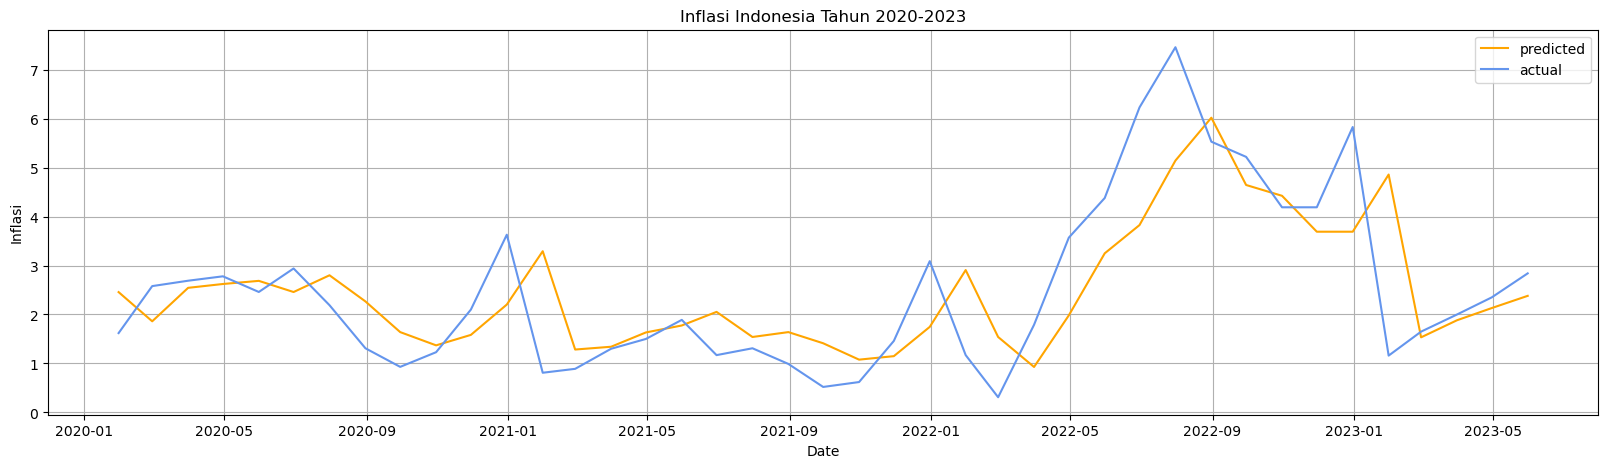

In [505]:
# Membuat grafik predicted dan actual 
plt.figure(figsize=(20,5))
plt.plot(data.Date, pred, color='orange', label='predicted')
plt.plot(data.Date, data.Inflasi, color='cornflowerblue', 
         label='actual')

plt.legend(loc='best')
plt.title(f'Inflasi Indonesia Tahun 2020-2023')
plt.xlabel('Date')
plt.ylabel('Inflasi')
plt.grid()
plt.show()

# Metrics Analysis

### Plot Diagnostic

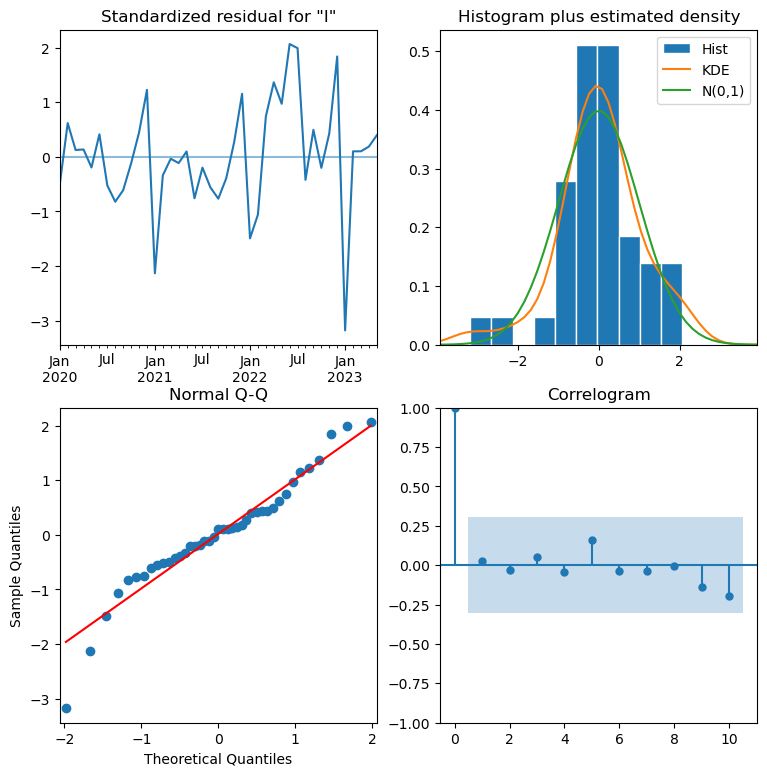

In [506]:
# Plot diagnostics 
model_fit.plot_diagnostics(figsize=(9,9))
plt.show()

In [507]:
# root mean squared error
rmse = mean_squared_error(pred, data2['Inflasi'], squared=False)
print("rmse: ",rmse)
# mean absolute error
mae = mean_absolute_error(pred, data2['Inflasi'])
print("mae: ",mae)
# mean absolute percentage erro
mape = mean_absolute_percentage_error(pred, data2['Inflasi'])*100
print("mape: ",mape, '%')
# correlation
corr = np.corrcoef(pred, data2['Inflasi'])[0,1]
print("corr: ",corr)

rmse:  1.1667202308781406
mae:  0.8457872536027117
mape:  34.88588081602307 %
corr:  0.7240850984432359


Nilai RMSE dan MAE tidak terlalu buruk walaupun diatas 0.5 karena nilai data inflasi berkisar di sekitar 0 sehingga perbedaan sedikit dapat menyebabkan perubahan pada RMSE dan MAE dengan cukup besar. Hal ini juga berlaku untuk MAPE. Walaupun nilai MAPE 35%, namun model masih bisa digunakan untuk memprediksi data ini.

# Forecasting Data

In [508]:
# Melakukan forecasting untuk 18 bulan kedepan
forecast = model_fit.predict(start=0, end=len(data2) + 18, typ='levels', dynamic=False)
# Tampilkan hasil
forecast.tail(5)

2024-08-31    2.459777
2024-09-30    2.459101
2024-10-31    2.458618
2024-11-30    2.458275
2024-12-31    2.458031
Freq: M, Name: predicted_mean, dtype: float64

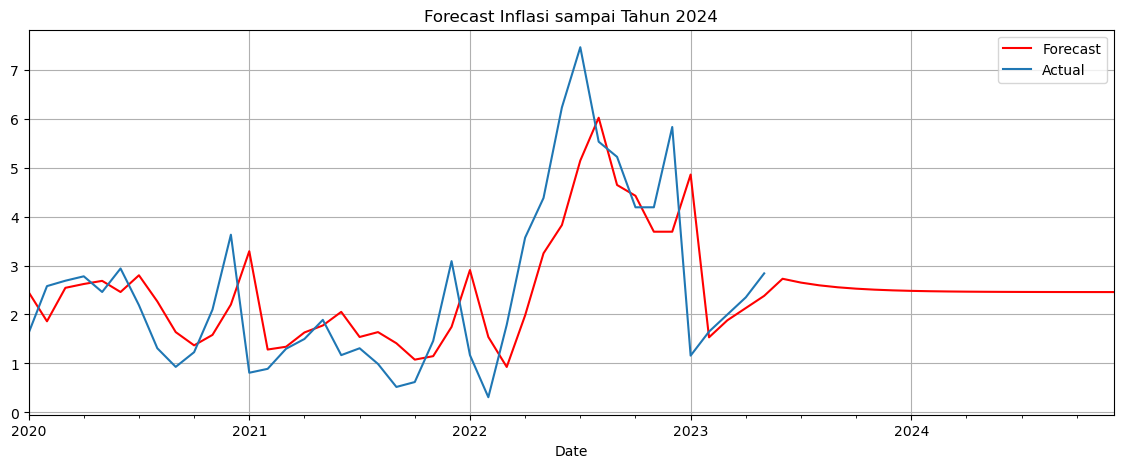

In [509]:
# Plot hasil forecast dengan data asli

forecast.plot(legend=True, label='Forecast', figsize=(14,5), color='red')
data2['Inflasi'].plot(legend=True, label='Actual')
plt.title('Forecast Inflasi sampai Tahun 2024')
plt.legend()
plt.grid()
plt.show()

# Summary

Dari grafik di atas, inflasi yang terjadi setelah bulan Mei 2023 cenderung stabil di angka 2,5. Pada bulan Juni 2023, inflasi berada di angka 2,8 dan terus turun dengan pelan sampai di angka 2.5. Diperkirakan inflasi akan terus turun, namun tidak esktrim.

Perlu diingat bahwa hasil forecasting dapat berubah tergantung dengan nilai p,d,q yang kita pilih. 

# Daftar Pustaka

1. https://www.bi.go.id/id/fungsi-utama/moneter/inflasi/default.aspx#:~:text=Inflasi%20adalah%20kenaikan%20harga%20barang,menerus%20dalam%20jangka%20waktu%20tertentu.
2. https://github.com/msikorski93/Forecasting-Inflation-Rates-of-Poland/blob/main/inflation_forecast_notebook.ipynb
3. https://github.com/katiehuangx/Google-Data-Analytics-Capstone/blob/main/bellabeat-data-analysis.ipynb
4. https://medium.com/@ooemma83/how-to-interpret-acf-and-pacf-plots-for-identifying-ar-ma-arma-or-arima-models-498717e815b6